In [1187]:
import pandas as pd

bank_data = pd.read_csv("./Proj1_Data.csv")
bank_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [1188]:
#check if we have null data

bank_data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### as you can see there's no null data. so, no need to use fillna method.

## shuffling the data

In [1189]:
from sklearn.utils import shuffle

bank_data = shuffle(bank_data)
bank_data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5268,5269,15687648,Nicholson,691,France,Male,28,1,0.00,2,0,0,92865.41,0
5421,5422,15757661,Trevisano,589,France,Female,39,7,0.00,2,0,0,95985.64,0
6933,6934,15679961,Davidson,708,Spain,Male,46,7,68799.72,1,1,1,39704.14,0
5566,5567,15796015,Wu,633,Germany,Male,42,3,126041.02,1,0,1,11796.89,0
1904,1905,15677382,Miller,625,Spain,Female,69,1,107569.96,1,1,1,182336.45,0


In [1190]:
data_set = bank_data.iloc[:, 3:13]
output = bank_data.iloc[:, 13]

In [1191]:
data_set.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [1192]:
data_set['Geography'] = data_set['Geography'].astype('category')
data_set['Gender'] = data_set['Gender'].astype('category')

## converting categorical data to numerical data 

In [1193]:
Geography = pd.get_dummies(bank_data['Geography'])
Gender = pd.get_dummies(bank_data['Gender'])

## dropping categorical data-type and concating its nummerical equivalent

In [1194]:
data_set = pd.concat([data_set,Geography,Gender],axis=1)
data_set = data_set.drop(['Geography','Gender'],axis=1)

In [1195]:
data_set.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
France               uint8
Germany              uint8
Spain                uint8
Female               uint8
Male                 uint8
dtype: object

## splitting training and testing data using scikit-learn library

In [1196]:
from sklearn.model_selection import train_test_split

data_set_train, data_set_test, output_train, output_test = train_test_split(data_set, output, test_size = 0.2, random_state = 0)
print(data_set_train.shape, data_set_test.shape, output_train.shape, output_test.shape)

(8000, 13) (2000, 13) (8000,) (2000,)


## normalizing the data using the join of 'fit' and 'transform' methods in scikit-learn library

In [1197]:
from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
x_train = ssc.fit_transform(data_set_train)
x_test = ssc.transform(data_set_test)

## training model

In [1198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
import numpy as np
from tensorflow.keras import optimizers

#create an object of sequential model
nn_classifier = Sequential()

number_of_columns = x_train.shape[1] # Which is also number of features.

# Add the first hidden layer
nn_classifier.add(layers.Dense(16, activation = 'relu', input_shape = (number_of_columns,)))

#Adding the second hidden layer
nn_classifier.add(layers.Dense(16, activation = 'relu'))

#changing the weights which is not a correct aproach to be done manualy I think!
#nn_classifier.set_weights(np.array(nn_classifier.get_weights()) + 0.5)

#dropout layer
nn_classifier.add(Dropout(0.2))


sgd = optimizers.SGD(lr = 0.00195, momentum = 0.9)


# Adding the output layer
nn_classifier.add(layers.Dense(1, activation = 'sigmoid'))

In [1199]:
nn_classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])

nn_classifier.summary()

Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_245 (Dense)            (None, 16)                224       
_________________________________________________________________
dense_246 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_76 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_247 (Dense)            (None, 1)                 17        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [1200]:
#model is trained over 100 epochs
model = nn_classifier.fit(x_train, output_train, validation_split = 0.2, batch_size = 500, epochs = 500)

Train on 6400 samples, validate on 1600 samples
Epoch 1/500
6400/6400 [==============================] - 2s 298us/sample - loss: 0.6615 - acc: 0.6114 - val_loss: 0.6298 - val_acc: 0.6769
Epoch 2/500
6400/6400 [==============================] - 0s 15us/sample - loss: 0.6384 - acc: 0.6534 - val_loss: 0.6067 - val_acc: 0.7125
Epoch 3/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.6160 - acc: 0.7048 - val_loss: 0.5882 - val_acc: 0.7519
Epoch 4/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.6024 - acc: 0.7305 - val_loss: 0.5731 - val_acc: 0.7756
Epoch 5/500
6400/6400 [==============================] - 0s 13us/sample - loss: 0.5913 - acc: 0.7547 - val_loss: 0.5607 - val_acc: 0.7919
Epoch 6/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.5771 - acc: 0.7713 - val_loss: 0.5502 - val_acc: 0.7994
Epoch 7/500
6400/6400 [==============================] - 0s 14us/sample - loss: 0.5731 - acc: 0.7788 - val_loss: 0.5414 - va

Epoch 60/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4847 - acc: 0.7952 - val_loss: 0.4585 - val_acc: 0.8031
Epoch 61/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4891 - acc: 0.7944 - val_loss: 0.4579 - val_acc: 0.8031
Epoch 62/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4870 - acc: 0.7948 - val_loss: 0.4574 - val_acc: 0.8031
Epoch 63/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4890 - acc: 0.7947 - val_loss: 0.4570 - val_acc: 0.8037
Epoch 64/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4863 - acc: 0.7959 - val_loss: 0.4564 - val_acc: 0.8044
Epoch 65/500
6400/6400 [==============================] - 0s 13us/sample - loss: 0.4870 - acc: 0.7952 - val_loss: 0.4559 - val_acc: 0.8044
Epoch 66/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4859 - acc: 0.7967 - val_loss: 0.4555 - val_acc: 0.8050
Epoch 67/500
6400/6400 [========

6400/6400 [==============================] - 0s 9us/sample - loss: 0.4635 - acc: 0.7970 - val_loss: 0.4363 - val_acc: 0.8112
Epoch 120/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4615 - acc: 0.7978 - val_loss: 0.4361 - val_acc: 0.8112
Epoch 121/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4626 - acc: 0.7986 - val_loss: 0.4358 - val_acc: 0.8112
Epoch 122/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4623 - acc: 0.7992 - val_loss: 0.4356 - val_acc: 0.8112
Epoch 123/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4603 - acc: 0.7994 - val_loss: 0.4353 - val_acc: 0.8112
Epoch 124/500
6400/6400 [==============================] - 0s 8us/sample - loss: 0.4614 - acc: 0.8002 - val_loss: 0.4351 - val_acc: 0.8112
Epoch 125/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4592 - acc: 0.7984 - val_loss: 0.4349 - val_acc: 0.8106
Epoch 126/500
6400/6400 [=============

Epoch 178/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4506 - acc: 0.8006 - val_loss: 0.4256 - val_acc: 0.8163
Epoch 179/500
6400/6400 [==============================] - 0s 12us/sample - loss: 0.4458 - acc: 0.8012 - val_loss: 0.4255 - val_acc: 0.8169
Epoch 180/500
6400/6400 [==============================] - 0s 12us/sample - loss: 0.4468 - acc: 0.8006 - val_loss: 0.4254 - val_acc: 0.8163
Epoch 181/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4464 - acc: 0.8027 - val_loss: 0.4252 - val_acc: 0.8163
Epoch 182/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4455 - acc: 0.8006 - val_loss: 0.4251 - val_acc: 0.8163
Epoch 183/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4461 - acc: 0.8011 - val_loss: 0.4249 - val_acc: 0.8163
Epoch 184/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4483 - acc: 0.8003 - val_loss: 0.4248 - val_acc: 0.8169
Epoch 185/500
6400/64

6400/6400 [==============================] - 0s 10us/sample - loss: 0.4388 - acc: 0.8041 - val_loss: 0.4183 - val_acc: 0.8188
Epoch 237/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4376 - acc: 0.8048 - val_loss: 0.4182 - val_acc: 0.8188
Epoch 238/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4355 - acc: 0.8027 - val_loss: 0.4181 - val_acc: 0.8181
Epoch 239/500
6400/6400 [==============================] - 0s 8us/sample - loss: 0.4363 - acc: 0.8034 - val_loss: 0.4179 - val_acc: 0.8181
Epoch 240/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4354 - acc: 0.8059 - val_loss: 0.4178 - val_acc: 0.8188
Epoch 241/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4330 - acc: 0.8061 - val_loss: 0.4177 - val_acc: 0.8188
Epoch 242/500
6400/6400 [==============================] - 0s 8us/sample - loss: 0.4366 - acc: 0.8056 - val_loss: 0.4176 - val_acc: 0.8188
Epoch 243/500
6400/6400 [============

Epoch 295/500
6400/6400 [==============================] - 0s 12us/sample - loss: 0.4286 - acc: 0.8105 - val_loss: 0.4119 - val_acc: 0.8206
Epoch 296/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4288 - acc: 0.8078 - val_loss: 0.4118 - val_acc: 0.8206
Epoch 297/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4281 - acc: 0.8097 - val_loss: 0.4116 - val_acc: 0.8206
Epoch 298/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4269 - acc: 0.8084 - val_loss: 0.4115 - val_acc: 0.8206
Epoch 299/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4288 - acc: 0.8084 - val_loss: 0.4114 - val_acc: 0.8206
Epoch 300/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4284 - acc: 0.8070 - val_loss: 0.4113 - val_acc: 0.8206
Epoch 301/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4267 - acc: 0.8086 - val_loss: 0.4112 - val_acc: 0.8213
Epoch 302/500
6400/64

6400/6400 [==============================] - 0s 11us/sample - loss: 0.4232 - acc: 0.8100 - val_loss: 0.4056 - val_acc: 0.8281
Epoch 354/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4195 - acc: 0.8134 - val_loss: 0.4055 - val_acc: 0.8281
Epoch 355/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4232 - acc: 0.8116 - val_loss: 0.4054 - val_acc: 0.8288
Epoch 356/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4193 - acc: 0.8105 - val_loss: 0.4053 - val_acc: 0.8288
Epoch 357/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4208 - acc: 0.8136 - val_loss: 0.4052 - val_acc: 0.8288
Epoch 358/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4165 - acc: 0.8145 - val_loss: 0.4050 - val_acc: 0.8288
Epoch 359/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4199 - acc: 0.8105 - val_loss: 0.4049 - val_acc: 0.8288
Epoch 360/500
6400/6400 [============

6400/6400 [==============================] - 0s 11us/sample - loss: 0.4142 - acc: 0.8197 - val_loss: 0.3989 - val_acc: 0.8375
Epoch 412/500
6400/6400 [==============================] - 0s 14us/sample - loss: 0.4151 - acc: 0.8159 - val_loss: 0.3988 - val_acc: 0.8375
Epoch 413/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4124 - acc: 0.8205 - val_loss: 0.3987 - val_acc: 0.8381
Epoch 414/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4155 - acc: 0.8166 - val_loss: 0.3986 - val_acc: 0.8381
Epoch 415/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4106 - acc: 0.8211 - val_loss: 0.3984 - val_acc: 0.8381
Epoch 416/500
6400/6400 [==============================] - 0s 13us/sample - loss: 0.4137 - acc: 0.8198 - val_loss: 0.3984 - val_acc: 0.8381
Epoch 417/500
6400/6400 [==============================] - 0s 9us/sample - loss: 0.4102 - acc: 0.8227 - val_loss: 0.3982 - val_acc: 0.8381
Epoch 418/500
6400/6400 [===========

Epoch 470/500
6400/6400 [==============================] - 0s 12us/sample - loss: 0.4043 - acc: 0.8252 - val_loss: 0.3919 - val_acc: 0.8450
Epoch 471/500
6400/6400 [==============================] - 0s 11us/sample - loss: 0.4068 - acc: 0.8228 - val_loss: 0.3918 - val_acc: 0.8456
Epoch 472/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4057 - acc: 0.8272 - val_loss: 0.3917 - val_acc: 0.8450
Epoch 473/500
6400/6400 [==============================] - 0s 10us/sample - loss: 0.4063 - acc: 0.8241 - val_loss: 0.3916 - val_acc: 0.8456
Epoch 474/500
6400/6400 [==============================] - 0s 12us/sample - loss: 0.4070 - acc: 0.8253 - val_loss: 0.3914 - val_acc: 0.8456
Epoch 475/500
6400/6400 [==============================] - 0s 12us/sample - loss: 0.4066 - acc: 0.8264 - val_loss: 0.3913 - val_acc: 0.8462
Epoch 476/500
6400/6400 [==============================] - 0s 13us/sample - loss: 0.4029 - acc: 0.8278 - val_loss: 0.3912 - val_acc: 0.8462
Epoch 477/500
6400/6

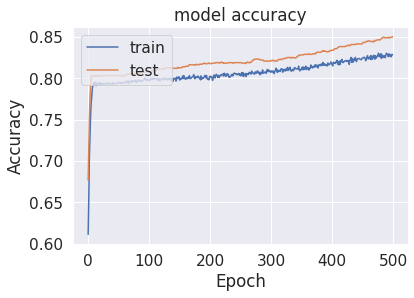

In [1201]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

#Accuracy vs Value Accuracy
model.history.keys()
# summarize history for accuracy
plt.plot(model.history['acc'])
plt.plot(model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

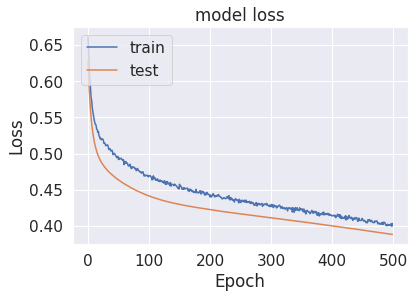

In [1202]:
#loss vs value loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc = 'upper left')

In [1203]:
#prediction variable
output_pred = nn_classifier.predict(x_test)#Model score calculation

from sklearn.metrics import accuracy_score
score = accuracy_score(output_pred.astype('int'), output_test.astype('int'))
print(round(score*100, 2))

80.2


In [1206]:
from sklearn.metrics import classification_report

print(classification_report(output_test.astype('int'), output_pred.astype('int')))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1604
           1       0.00      0.00      0.00       396

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.64      0.80      0.71      2000



## confusion matrix

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

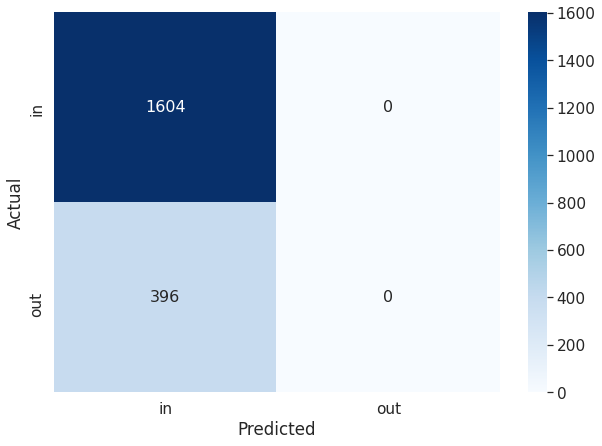

In [1207]:
import seaborn as sn
import numpy as np
from sklearn.metrics import confusion_matrix

y_true = ['in', 'out']
y_pred = ['in', 'out']
data = confusion_matrix(output_test.astype('int'), output_pred.astype('int'))
df_cm = pd.DataFrame(data, columns = np.unique(y_true), index = np.unique(y_true))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10, 7))
sn.set(font_scale = 1.4)
sn.heatmap(df_cm, cmap = "Blues", fmt = "d", annot = True, annot_kws = {"size":16})